# save the output
import pickle
with open('sentence_embedding_on_case.txt','wb') as file:
  pickle.dump(embedding, file) 
with open('sentence_embedding_on_case.txt','rb') as f:
  ff=pickle.load(f)



 import json
 with open("test", "w") as fp:
     json.dump(l, fp)

 with open("test", "r") as fp:
     b = json.load(fp)


#imports

In [1]:
import tweepy
import time
import csv
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/MyDrive')

In [ ]:
os.getcwd()

'/content/drive/MyDrive'

In [ ]:
#os.listdir()

#twitter api

In [ ]:
#client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAP%2FUjAEAAAAAwN32tAj9XbqUL4z2tN%2BOifedeTs%3Dyz1pbZKBreSE8VqzRARcOYQjyGuXURrZNrbx2MuDQo4CNLGI2u')
twitter_keys = {
        'consumer_key':        '4RLGTBpgutMh3P3d6KGhcYuhs',
        'consumer_secret':     'qyVBsMUTWMdASsUnBlYeKE7KITgPrkCf6JVK5tA5jujVJb1KTr',
        'access_token_key':    '1572990615536783363-rVUf9DOFsLRiiRWWQr5BA3GCzcBdID',
        'access_token_secret': 'PJSUirEQBH01a5mudR9MfnJfZYY7PzRJ9HTD8SYLjXXkG'
    }




#Setup access to API
auth = tweepy.OAuthHandler(twitter_keys['consumer_key'], twitter_keys['consumer_secret'])
auth.set_access_token(twitter_keys['access_token_key'], twitter_keys['access_token_secret'])
api = tweepy.API(auth)

# workflow to show how the number of tweets change over time for the providung hashtags

In [ ]:
lis=list()
with open('extracted_tweets_dataset.csv','r',encoding='utf-8') as file:
    reader= csv.reader(file)
    for row in reader:
        #print(type(row[0]))
        lis.append(row[0][0:7])
        #new_s=row[0][0:10]


In [ ]:
lis.pop(0)

'timesta'

In [ ]:
lis.sort()

In [ ]:
len(lis)

247523

In [ ]:
from numpy.core.numeric import count_nonzero

j=0
counts_dic=dict()
for i in lis:
  j+=1
  if i not in counts_dic.keys():
      counts_dic[i]=lis.count(i)      
  if j%1000==0:
    print(f"{j} number of iteration")

In [ ]:
date=list(counts_dic.keys())
count=list(counts_dic.values())

In [ ]:
counts_dic

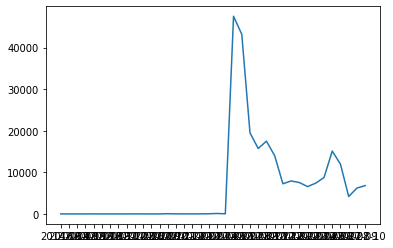

In [ ]:
from matplotlib import pyplot as plt
plt.plot(date,count)

In [ ]:
time

In [ ]:
len(count)

600

In [ ]:
j=0
new_c=list()
b_c=list()
for i in range(len(counts_dic)):
  if date[i]<"2021-06":
      b_c.append(count[i])
  elif new_c:
    new_c.append(count[i])
  else:
    new_c.append(sum(b_c[0:i]))
    new_c.append(count[i])


NameError: ignored

In [ ]:
new_c

[316,
 47541,
 43201,
 19493,
 15737,
 17494,
 13994,
 7246,
 7933,
 7546,
 6571,
 7410,
 8759,
 15112,
 11958,
 4187,
 6218,
 6807]

In [ ]:
len(b_c)

21

In [ ]:
print(len(new_c))
len(date[19:])
x_as=date[19:]
x_as.pop(0)
x_as[0]='2014-06 to 2021-05'
len(x_as)

0


NameError: ignored

In [ ]:
fig = plt.figure(figsize = (30, 5))
plt.bar(x_as,new_c, color ='b')
 
#plt.xlabel("Courses offered")
#plt.ylabel("No. of students enrolled")
plt.title("number of tweets over time wit respect to the provide Hashtags")
plt.show()



#plt.bar(range(len(new_c)),new_c)

NameError: ignored

2018-12-04 10:07:00


In [ ]:
"2018--04"<"2022-06-23"

True

#provide a workflow to get plot the trend of the hashtags over time.
get count over month for now


In [ ]:
#df = pd.read_csv('extracted_tweets_dataset.csv')

In [ ]:
df = pd.read_parquet('twitter_data.parquet')

In [ ]:
df.drop_duplicates(subset=['tweet_id'])

In [ ]:
df.head()

In [5]:
def clean_data(filename: str):
    def remove_emojis(data):
        emoj = re.compile("["
                          u"\U0001F600-\U0001F64F"  # emoticons
                          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                          u"\U0001F680-\U0001F6FF"  # transport & map symbols
                          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                          u"\U00002500-\U00002BEF"  # chinese char
                          u"\U00002702-\U000027B0"
                          u"\U00002702-\U000027B0"
                          u"\U000024C2-\U0001F251"
                          u"\U0001f926-\U0001f937"
                          u"\U00010000-\U0010ffff"
                          u"\u2640-\u2642"
                          u"\u2600-\u2B55"
                          u"\u200d"
                          u"\u23cf"
                          u"\u23e9"
                          u"\u231a"
                          u"\ufe0f"  # dingbats
                          u"\u3030"
                          "]+", re.UNICODE)
        return re.sub(emoj, '', data)

    # Removing mentions and hashtags and url
    def remove_mentions_and_tags(text):
        text = re.sub(r'@\S*', '', text)
        text = re.sub(r'http\S+', '', text)
        return re.sub(r'#\S*', '', text)

    read_df = pd.read_parquet(filename)
    read_df = read_df.loc[read_df['tweet_type'] != 'retweet']
    read_df = read_df.drop_duplicates(subset=['tweet_id'], ignore_index=True)
    read_df.text = read_df.text.apply(remove_emojis)
    read_df.text = read_df.text.apply(remove_mentions_and_tags)
    read_df['text'] = read_df['text'].str.replace(
        r'[^\w\s]+', '')  # remove punctuations
    read_df['text'] = read_df['text'].str.replace('\d+', '')  # removes number
    

    return read_df

In [6]:
#creating a data frame of data containing only original tweets
df = clean_data("twitter_data.parquet")

<ipython-input-5-9b751c704dc5>:36: FutureWarning: The default value of regex will change from True to False in a future version.
  read_df['text'] = read_df['text'].str.replace(
<ipython-input-5-9b751c704dc5>:38: FutureWarning: The default value of regex will change from True to False in a future version.
  read_df['text'] = read_df['text'].str.replace('\d+', '')  # removes number


In [7]:
#extracting data after 2021.06
dates=list()

for row,record in enumerate(df.hashtags):
  if record!='[]'and df['timestamp'][row][0:7]>'2021-05' : 
    dates.append(df['timestamp'][row][0:7])


In [8]:
#creating date list that contains dates in Month from 2021-06 to 2022-10
date=list()
for dt in dates:
  if dt not in date:
    date.append(dt)

In [11]:
date.sort()
date

['2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12',
 '2022-01',
 '2022-02',
 '2022-03',
 '2022-04',
 '2022-05',
 '2022-06',
 '2022-07',
 '2022-08',
 '2022-09',
 '2022-10']

In [14]:
#extracting hashtags from the data set of original tweets
i=1
j=6
for i in range(1,3):
  for j in range(1,13):
    if i==1 and j>5 and j<10 or i==2 and j<10:
      globals()[f'hash202{i}_0{j}']=list()
      globals()[f'hash202{i}_0{j}'].extend([hash for row,hash in enumerate(df['hashtags']) if df['timestamp'][row][0:7]==f'202{i}-0{j}' and hash!='[]'])
        
    elif i==1 and j>5 and j>=10 or i==2 and j>=10:
      globals()[f'hash202{i}_{j}']=list()
      globals()[f'hash202{i}_{j}'].extend([hash for row,hash in enumerate(df['hashtags']) if df['timestamp'][row][0:7]==f'202{i}-{j}' and hash!='[]'])


In [15]:
#preprocessing the hashtags list from specific periods including making list of all hashtags for specific periods in Month
i=1
j=6
for i in range(1,3):
  for j in range(1,13):
    if i==1 and j>5 and j<10 or i==2 and j<10:
      globals()[f'all_hashtags_202{i}_0{j}']=list()
      for s in globals()[f'hash202{i}_0{j}']:
          bb=s.split(', ')
          a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
          globals()[f'all_hashtags_202{i}_0{j}'].extend(a)
        
        
    elif i==1 and j>5 and j>=10 or i==2 and j>=10:
      globals()[f'all_hashtags_202{i}_{j}']=list()
      for s in globals()[f'hash202{i}_{j}']:
          bb=s.split(', ')
          a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
          globals()[f'all_hashtags_202{i}_{j}'].extend(a)


In [16]:
#as an example all hashtags in the month period 2022-02 are stored such as ..
globals()[f'all_hashtags_2022_02']

['IchbinHanna',
 'unbezahlt',
 'IchbinHanna',
 'unbezahlt',
 'Ausbeutung',
 'AcademicMentalHealth',
 'IchbinHanna',
 'DieHellenDinge',
 'IchbinHanna',
 'IchBinHanna',
 'IchbinHanna',
 'IchbinHanna',
 'Teilzeitfalle',
 'Altersarmut',
 'Wissenschaft',
 'toxicacademia',
 'AcademicMentalHealth',
 'IchbinHanna',
 'Machtmissbrauch',
 'IchbinHanna',
 'AcademicMentalHealth',
 'IchbinHanna',
 'Zwangsteilzeit',
 'Wissenschaft',
 'Teilzeitfalle',
 'IchbinHanna',
 'Prekariat',
 'Wissenschaft',
 'IchbinHanna',
 'WissSystemFehler',
 'PsychischeGesundheit',
 'mentalhealth',
 'IchBinHanna',
 'IchbinHanna',
 'IchbinHanna',
 'Teilzeitstellen',
 'Selbstausbeutung',
 'IchbinHanna',
 'WissSystemFehler',
 'WissenschaftundFamilie',
 'Wissenschaft',
 'Elternzeit',
 'WissenschaftundFamilie',
 'Wissenschaft',
 'WissSystemFehler',
 'IchbinHanna',
 'IchbinHanna',
 'IchbinHanna',
 'IchBinHanna',
 'IchbinHanna',
 'HartzIV',
 'ALGII',
 'IchBinHanna',
 'IchBinHanna',
 '95vsWissZeitVG',
 'ichbinHanna',
 'Lehrbeauftrag

#most frequent hashtags monthly

In [18]:
def monthly_most_frequent_hashtags(year, month):
  #if month//10==0:
      mf=list()
      lis1=globals()[f'all_hashtags_202{year}_{month}']
      lis2=list()
      hashs=set()
      for i in lis1:
          lis2.append(i.lower())
      hanna=lis2.count("ichbinhanna")
      for i in lis2:
        if i not in hashs:
          hashs.add(i)
          count= lis2.count(i)
          mf.append((i,count/(len(lis2)-hanna)))
      mf= sorted(mf,key=lambda x: x[1],reverse=True)
      return mf



In [ ]:
a=monthly_most_frequent_hashtags(1,10)

In [ ]:
a[1:4]

[('wisssystemfehler', 0.12165725047080979),
 ('ichbinreyhan', 0.09378531073446328),
 ('wisszeitvg', 0.0327683615819209)]

In [19]:
#extract dates in a way to see the changes over seasons, every 3 month 
date_each3= [dt for row, dt in enumerate(date) if row%3==0]

In [20]:
date_each3

['2021-06', '2021-09', '2021-12', '2022-03', '2022-06', '2022-09']

<ipython-input-23-f263b8e343fb>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,row+1)


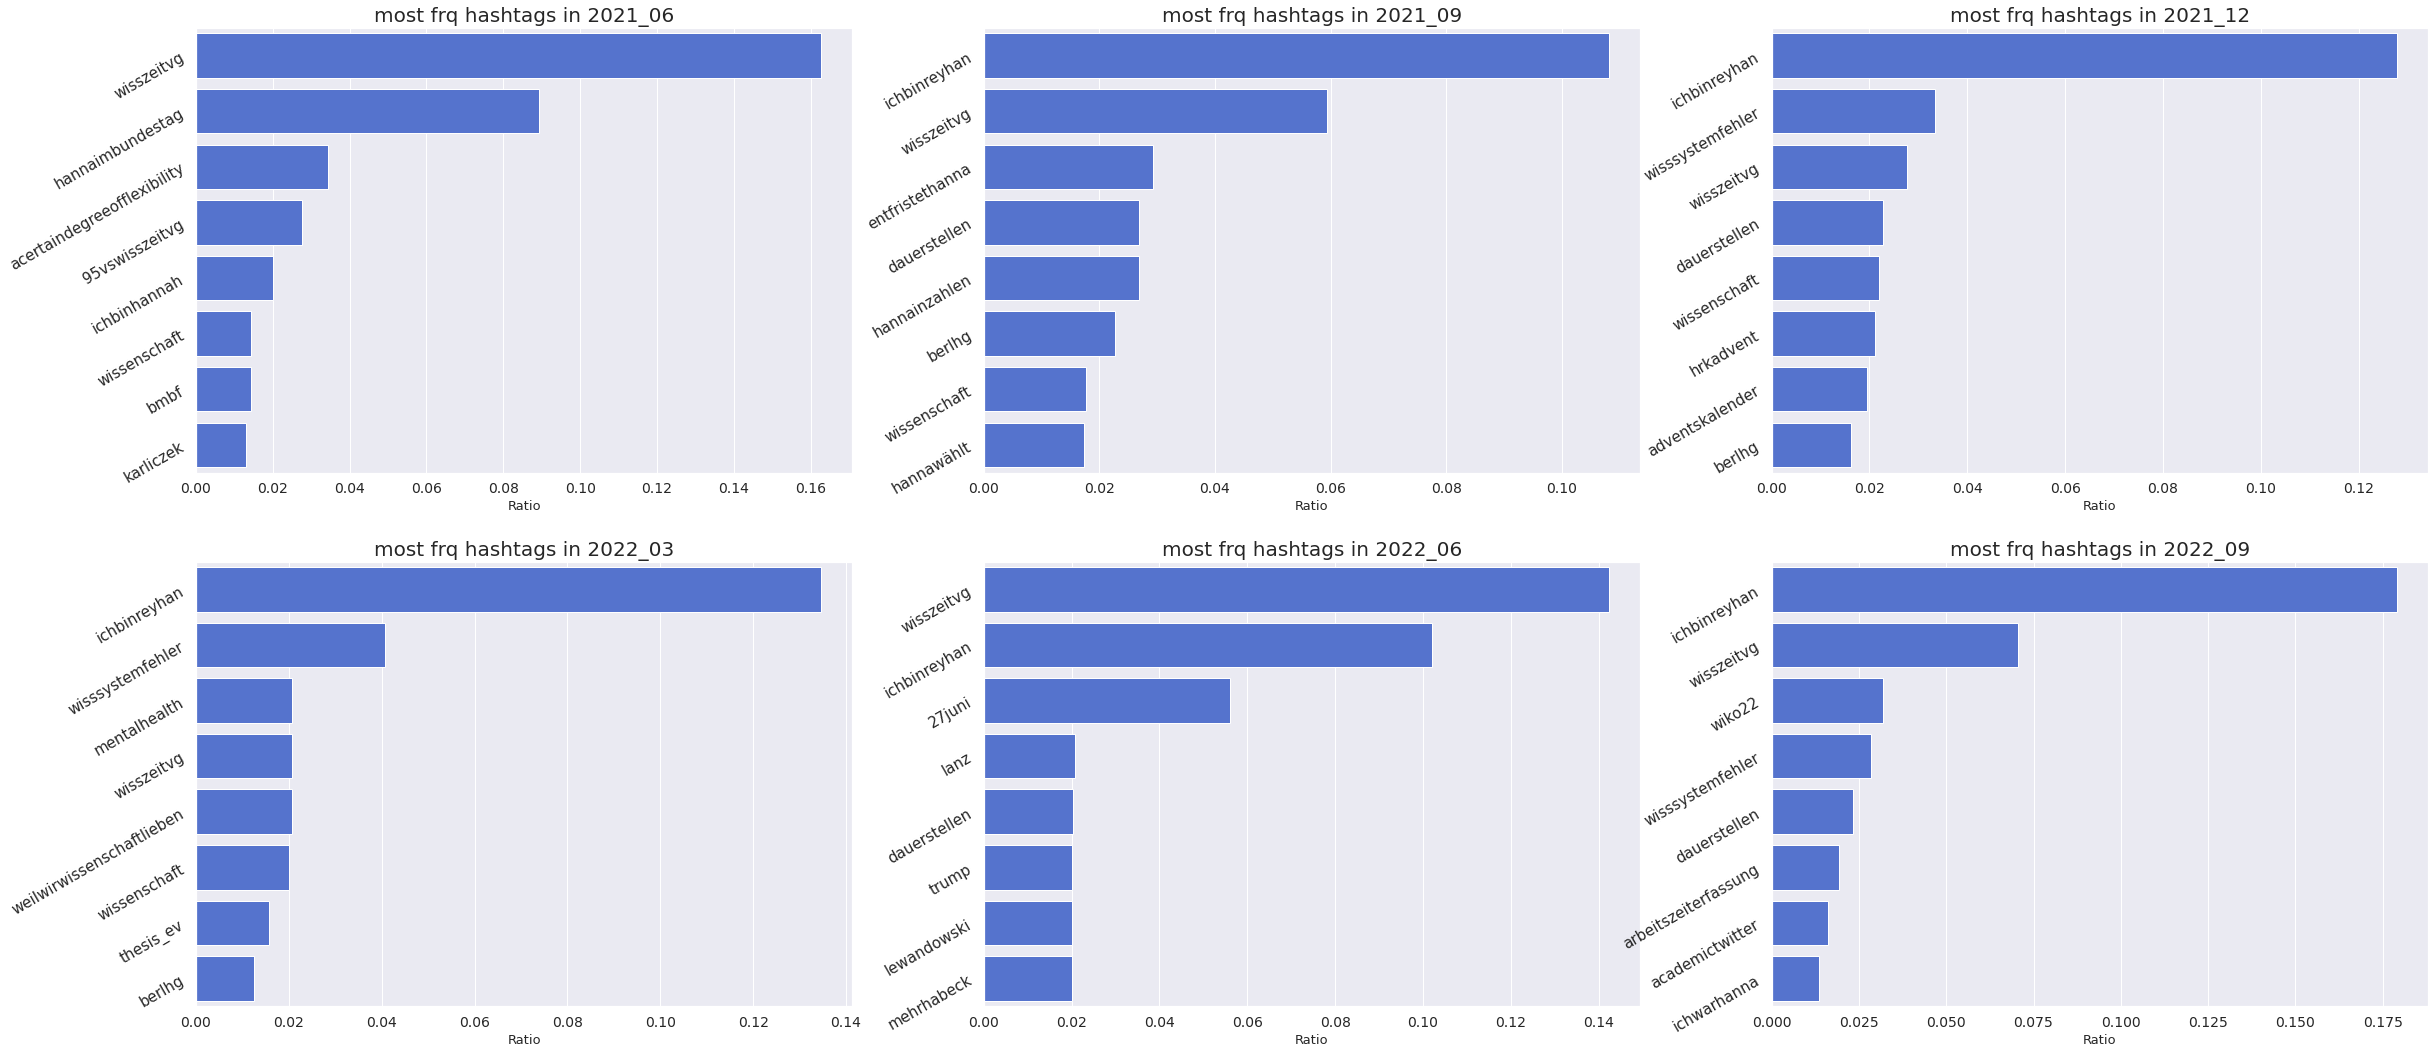

In [23]:
%matplotlib inline
sns.set(style="darkgrid")
fig = plt.subplots(figsize =(40, 18))

fig[1].set_ylabel("Hashtags",fontsize=20)
fig[1].set_xlabel("Ratio",fontsize=20)
plt.title("Most frequent hashtags over season")
for row,dt in enumerate(date_each3):
    i,j = dt[3],dt[5:]
    a=monthly_most_frequent_hashtags(i,j)
    x=[i[0] for i in a][1:9]
    y=[i[1] for i in a][1:9]
    plt.subplot(2,3,row+1)
    ax = sns.barplot(y=x,x=y,orient="h",color='royalblue' )
    ax.set_title(f'most frq hashtags in 202{i}_{j}',fontsize=20)
    ax.set_xlabel("Ratio",fontsize=13)
    plt.yticks(fontsize=15,rotation=30)
    plt.xticks(fontsize=14)

plt.show()


#hashcounter

In [24]:
#workflow that preprocess and counts determined hashtags
def hashtag_counter(hash_ls,txt):
  lis=list()
  for hashtag in hash_ls:
    lis.append(hashtag.lower())
  return lis.count(txt.lower())

In [25]:
hashtag_counter(all_hashtags_2021_10,'IchbinHanna')

1940

In [26]:
#make a list of frequency of the given hashtags over the peroids in the dataset
def hashtag_num_list(hashtag):
  hashtag_num=list()
  for dt in date:
      i,j = dt[3],dt[5:]
      lis = globals()[f'all_hashtags_202{i}_{j}']
      hashtag_num.append(hashtag_counter(lis,hashtag))
  return hashtag_num

In [27]:
hashtag_num_list('IchbinHanna')

[11126,
 4309,
 2029,
 1845,
 1940,
 1807,
 984,
 1209,
 1112,
 893,
 1045,
 1054,
 1964,
 1334,
 591,
 878,
 811]

# hashtags from the data set

In [29]:
#extract hashtgas from the dataset retrieved from twitter  
def hashtag_set_finder():
  hashtag_set=set()
  for dt in date:
      i,j = dt[3],dt[5:]
      lis = globals()[f'all_hashtags_202{i}_{j}']
      for i in lis:
        hashtag_set.add(i)
  return hashtag_set

In [30]:
hashtags_in_DS=hashtag_set_finder()

In [31]:
#number of distinct hashtags exctracted from the dataset
len(hashtags_in_DS)

8426

In [32]:
#extract hashtags from the data set and preprocess them
def generate_hashtags(dataset):
  listOfAllHashtags=list()
  for row, hash in enumerate(dataset.hashtags):
    if dataset['timestamp'][row][0:10]>="2021-06-01" and hash!='[]':
      bb=hash.split(', ') 
      
      a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
      listOfAllHashtags.extend(a)
  listOfAllHashtagsL=[i.lower() for i in listOfAllHashtags]
  return listOfAllHashtagsL


In [33]:
#list of all hashtags in the Dataset
lis=generate_hashtags(df)

In [34]:
#number of all hashtags in the dataset
len(lis)

76014

In [35]:
#frequency of hashtags "ichbinhanna" which is near to 50% of overall hashtags
lis.count('ichbinhanna')

34931

In [36]:
#get most frequent hashtags and sort them based on their freuency
l=[(i,lis.count(i)/len(lis)) for i in hashtags_in_DS if lis.count(i)>350]

In [37]:
l.sort(reverse=True , key= lambda k:k[1])-

In [38]:
l

[('ichbinhanna', 0.45953377009498253),
 ('ichbinreyhan', 0.054674138974399454),
 ('wisszeitvg', 0.052608729970794854),
 ('wisssystemfehler', 0.013550135501355014),
 ('hannaimbundestag', 0.011313705370063409),
 ('dauerstellen', 0.010708553687478622),
 ('wissenschaft', 0.008853632225642645),
 ('frististfrust', 0.007630173389112532),
 ('95vswisszeitvg', 0.006814534164759124),
 ('acertaindegreeofflexibility', 0.006354092667140264),
 ('ichbinhannah', 0.005959428526324098),
 ('gegenwisszeitvg10', 0.004959612702923145)]

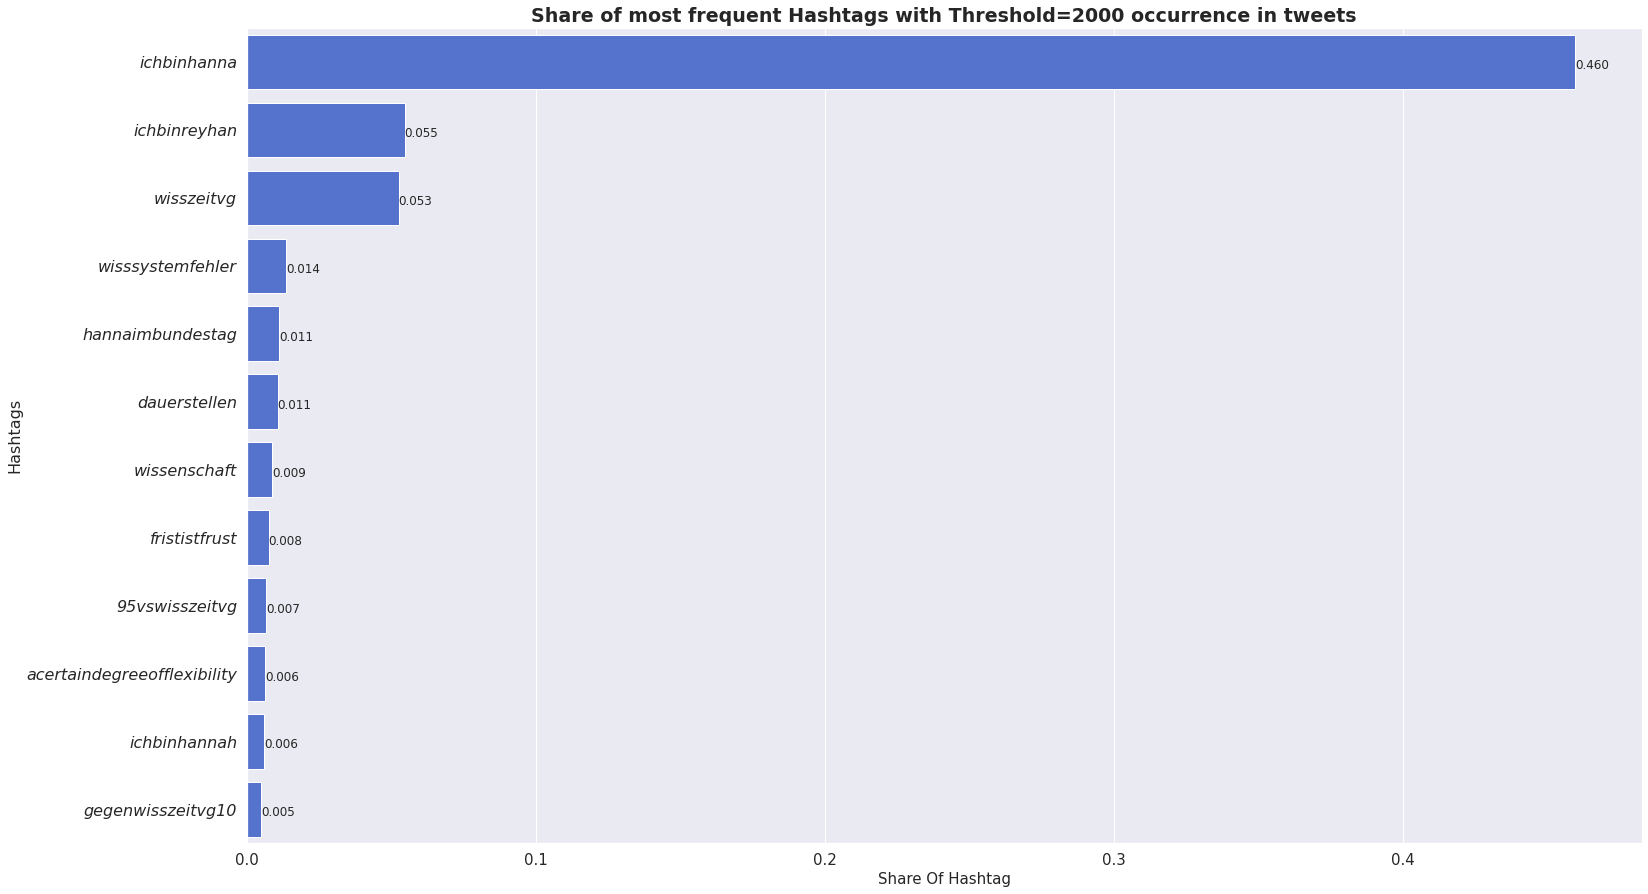

In [ ]:

sns.set(style="darkgrid")
hash=[i[0] for i in l]
share=[i[1] for i in l]
fig = plt.subplots(figsize =(25, 15))
ax = sns.barplot(y=hash,x=share,orient="h",color='royalblue' )
ax.set_title('Share of most frequent Hashtags with Threshold=2000 occurrence in tweets',fontsize=19,fontweight="bold");

#Set our x and y labels and adjust their size
ax.set_xlabel('Share Of Hashtag',fontsize=15)
ax.set_ylabel('Hashtags', fontsize=16)
plt.yticks(fontsize = 16,fontstyle="italic")
plt.xticks(fontsize = 15)
initialx=0
for p in ax.patches:
  ax.text(p.get_width(),initialx+p.get_height()/8,"{:.3f}".format(p.get_width()))
  initialx+=1

#evolution of hashtags over time

plot for the frequent hashtags from the data set

In [40]:
date2=list()
for row, i in enumerate(date):
  if row%3==0:
    date2.append(i)
  elif row <6:
    date2.append(f"0{row+6}")
  else:
    date2.append(f"0{row-6}")

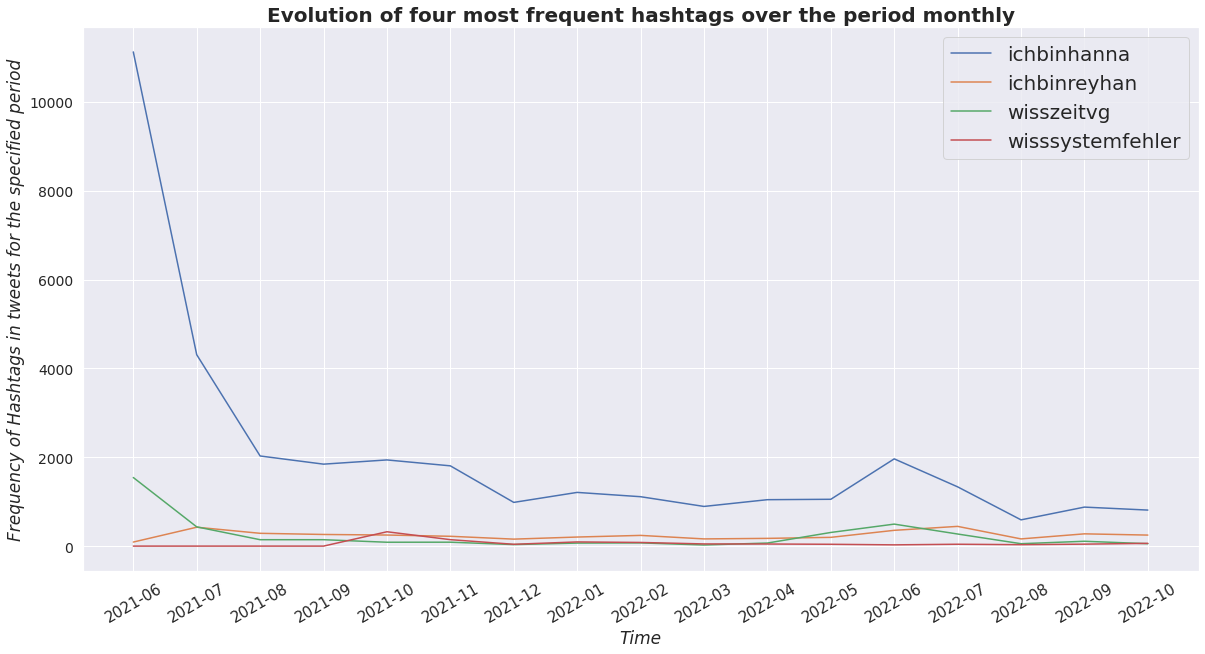

In [41]:
hashlist_from_database=[i[0] for i in l][0:4]
#hashlist_from_database=hashlist_from_database[0:4]
fig = plt.figure(figsize = (20, 10))
for i in hashlist_from_database:
  plt.plot(date,hashtag_num_list(i))#/summ

plt.legend([j for j in hashlist_from_database ], fontsize=20) 
plt.xticks(fontsize = 15, rotation=30)
plt.yticks(fontsize = 14)

plt.xlabel("Time",fontsize = 17,fontstyle="italic")
plt.ylabel("Frequency of Hashtags in tweets for the specified period",fontsize = 17,fontstyle="italic")
plt.title("Evolution of four most frequent hashtags over the period monthly",fontsize = 20,fontweight="bold")
plt.show()



Text(0.5, 1.0, 'Evolution trend of four most frequent hashtags over the period (monthly)')

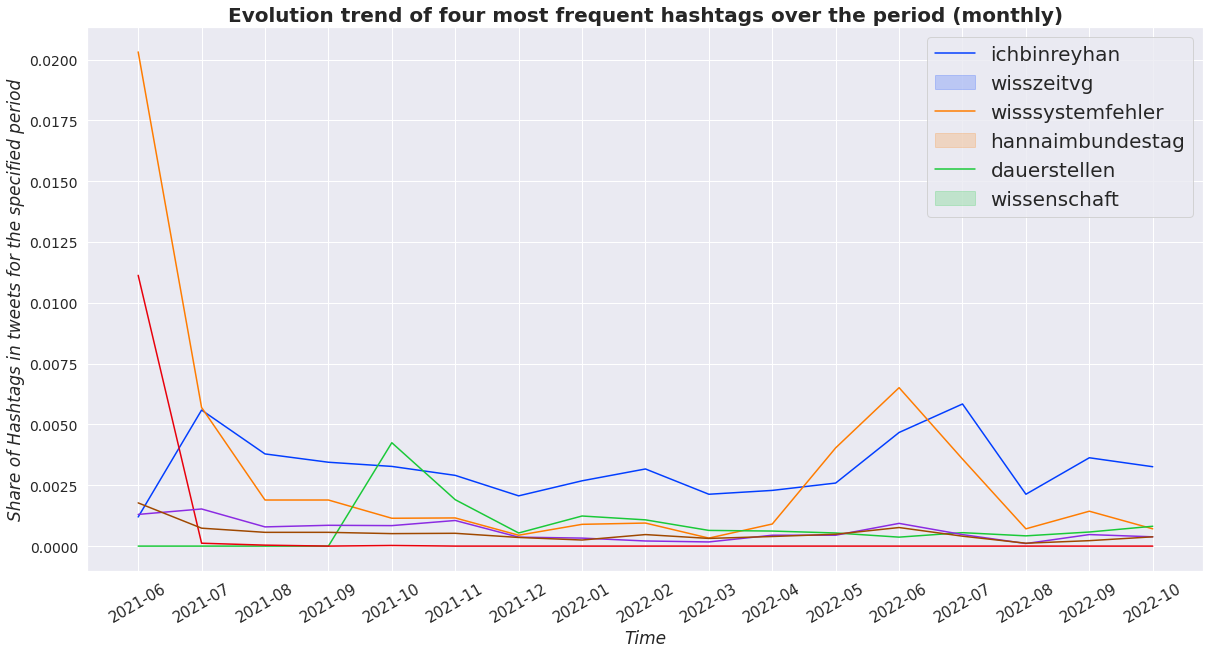

In [51]:
%matplotlib inline
sns.set(style="darkgrid")
sns.set_palette("bright",n_colors=9)
fig = plt.figure(figsize = (20, 10))
for i in hashlist_from_database:
  sns.lineplot(x=date,y=np.array(hashtag_num_list(i))/np.size(lis))#/summ

plt.legend([j for j in hashlist_from_database], fontsize=20) 
plt.xticks(fontsize = 15, rotation=30)
plt.yticks(fontsize = 14)

plt.xlabel("Time",fontsize = 17,fontstyle="italic")
plt.ylabel("Share of Hashtags in tweets for the specified period",fontsize = 17,fontstyle="italic")
plt.title("Evolution trend of four most frequent hashtags over the period (monthly)",fontsize = 20,fontweight="bold")





In [ ]:
#hashnum=list()
#for i in hashlist_from_database:
#  y=hashnum.append(np.array(hashtag_num_list(i))/np.size(lis))

#evolution seasonly apart from IchBinHanna

Text(0.5, 1.0, 'Evolution trend of four most frequent hashtags over the period (monthly) apart from #IchBinHanna')

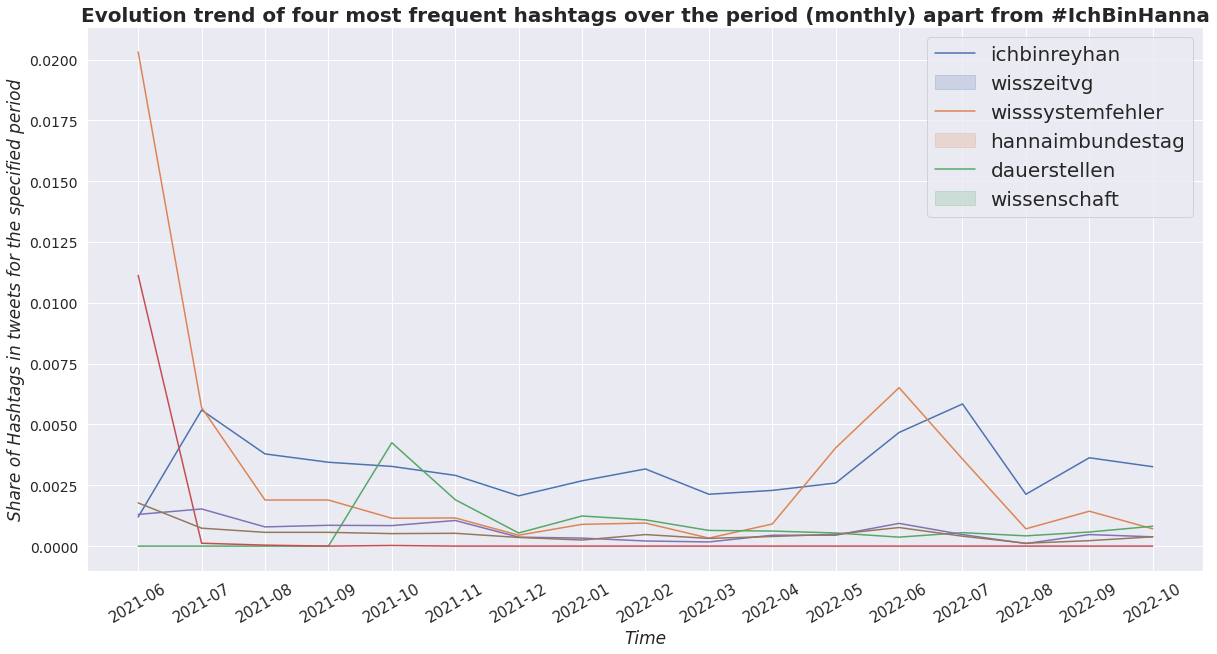

In [52]:
%matplotlib inline
from matplotlib import pyplot as plt
sns.set(style="darkgrid")
hashlist_from_database=[i[0] for i in l][1:7]

#hashlist_from_database=hashlist_from_database[0:4]
fig = plt.figure(figsize = (20, 10))
for i in hashlist_from_database:
  sns.lineplot(x=date,y=np.array(hashtag_num_list(i))/np.size(lis))#/summ

plt.legend([j for j in hashlist_from_database ], fontsize=20) 
plt.xticks(fontsize = 15, rotation=30)
plt.yticks(fontsize = 14)

plt.xlabel("Time",fontsize = 17,fontstyle="italic")
plt.ylabel("Share of Hashtags in tweets for the specified period",fontsize = 17,fontstyle="italic")
plt.title("Evolution trend of four most frequent hashtags over the period (monthly) apart from #IchBinHanna",fontsize = 20,fontweight="bold")


<ipython-input-53-690c1bdea3b2>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


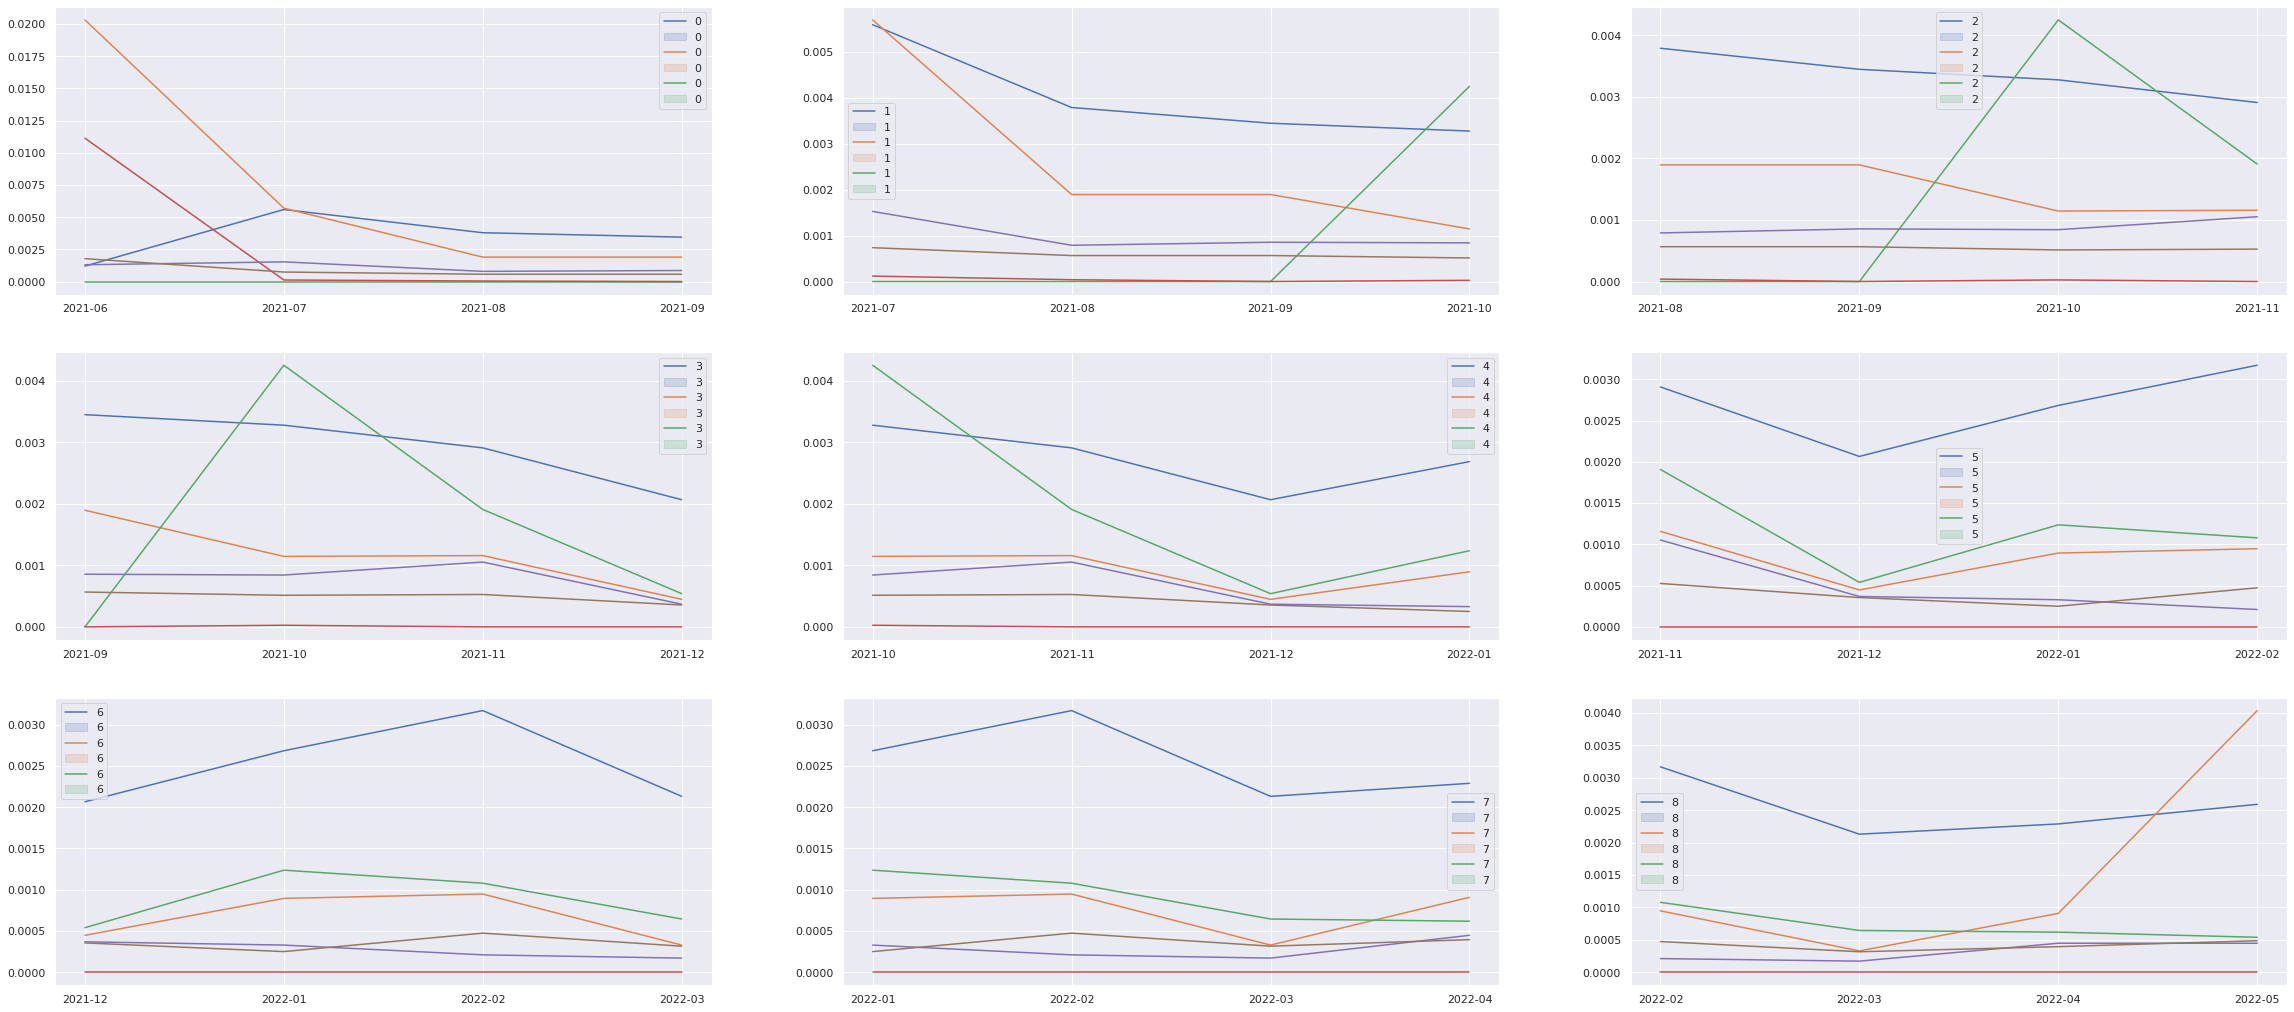

In [53]:
%matplotlib inline
sns.set(style="darkgrid")
fig = plt.subplots(figsize =(40, 18))
#fig[1].set_ylabel("Hashtags",fontsize=20)
#fig[1].set_xlabel("Ratio",fontsize=20)

for i in range (9):
 # for j in range (3):
    #i,j = dt[3],dt[5:]
    plt.subplot(3,3,i+1)
    for k in hashlist_from_database:
       ax = sns.lineplot(x=date[i:i+4],y=np.array(hashtag_num_list(k)[i:i+4])/np.size(lis))
       ax.legend([i for j in hashlist_from_database])
    #ax.set_title(f'202{i}_{j}',fontsize=20)
    #ax.set_xlabel("Ratio",fontsize=13)
    
    #plt.yticks(fontsize=15,rotation=30)
    #plt.xticks(fontsize=14)

plt.show()

# Tweet or retweet
developing of hashtags

In [ ]:
#df = pd.read_csv('extracted_tweets_dataset.csv')

In [ ]:
original=list()
retweet=list()

for row,record in enumerate(df.hashtags):
  if record!='[]'and df['tweet_type'][row]=='original' : 
    original.append(record)
  elif record!='[]'and df['tweet_type'][row]=='retweet' :
    retweet.append(record)

In [ ]:
retweet

In [ ]:
def hash_count2(ls,txt):
        b=list()
        for s in ls:
          bb=s.split(', ')
          a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
          b.extend(a)
        return hashtag_counter(b,txt)

In [ ]:
originals

tweet or retweets for hashtags from the Data set

In [ ]:

originals = [hash_count2(original,i[0]) for i in l]
retweets = [hash_count2(retweet,i[0]) for i in l]

In [ ]:
originals

[151804, 19263, 13861, 4614, 4897, 4267, 3235, 3492, 2862, 2603, 1713, 1718]

In [ ]:
hashii=[i[0] for i in l]


In [ ]:
p_orig=np.array(originals)/np.size(lis)
p_ret=np.array(retweets)/np.size(lis)

In [ ]:
p_orig=p_orig[0:4]
p_ret=p_ret[0:4]
hashii=hashii[0:4]

In [ ]:
hashii

['ichbinhanna', 'wisszeitvg', 'ichbinreyhan', 'hannaimbundestag']

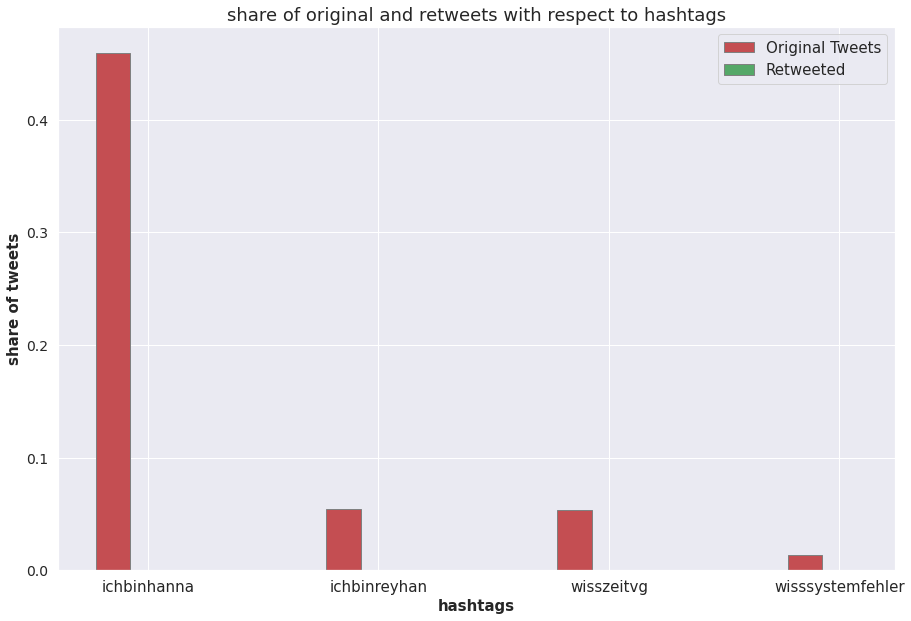

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(15, 10))
 
# set height of bar
#originals = [hash_count2(original,i) for i in hashtaglist]
#retweets = [hash_count2(retweet,i) for i in hashtaglist]

 
# Set position of bar on X axis
br1 = np.arange(4)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, p_orig, color ='r', width = barWidth,
        edgecolor ='grey', label ='Original Tweets')
plt.bar(br2, p_ret, color ='g', width = barWidth,
        edgecolor ='grey', label ='Retweeted')

 
# Adding Xticks
plt.xlabel('hashtags', fontweight ='bold', fontsize = 15)
plt.ylabel('share of tweets', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(4)],
        hashii,fontsize = 15)

plt.yticks(fontsize = 14)
plt.title('share of original and retweets with respect to hashtags',fontsize = 18)

 
plt.legend(fontsize = 15)
plt.show()

#  frequent hashtags barchart

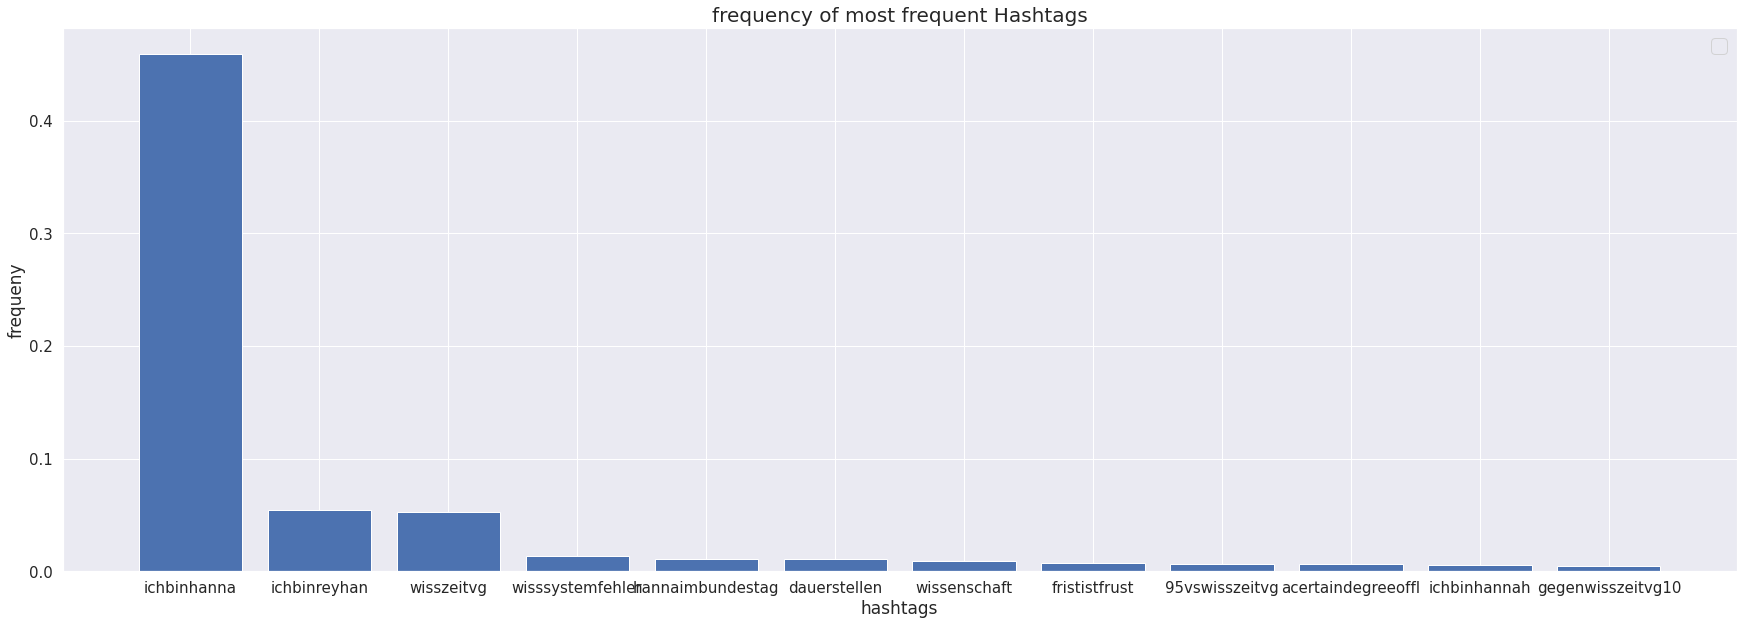

In [54]:
fig = plt.subplots(figsize =(30, 10))
x=[i[0][0:18] for i in l]
y=[i[1] for i in l]
plt.bar(x,y)
plt.xticks(fontsize = 15,fontstretch=1000)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 20)
#plt.xlabel("hashtags",fontsize = 20)
plt.title('frequency of most frequent Hashtags',fontsize = 20)
plt.xlabel("hashtags",fontsize = 17)
plt.ylabel("frequeny",fontsize = 17)
#plt.title("evolution of frequent hashtags over time",fontsize = 20)

plt.show()

#Concurrency of hashtags

In [55]:
#get the list of all frequent hashtags hith the specified given one based on a treshhold
def coocuring_hashtags_with(dataset,hashtag):#,hashtag
  listOfAllHashtags=list()
  for row, hash in enumerate(dataset.hashtags):
    if dataset['timestamp'][row][0:10]>="2021-06-01" and hash!='[]':
      bb=hash.split(', ') 
      a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
      for i in range(len(a)):
        a[i]=a[i].lower()
      if hashtag in a and len(a)>1:  
        listOfAllHashtags.append(a)
  hashtgs=[]
  for i in listOfAllHashtags:
    hashtgs.extend(i)
  list_of_concurrent_hash=[(i,hashtgs.count(i)/len(listOfAllHashtags)) for i in hashtags_in_DS if hashtgs.count(i)>200 and i.lower()!=hashtag]

  

  return list_of_concurrent_hash


In [56]:
e=coocuring_hashtags_with(df,"ichbinhanna")

In [57]:
e.sort(reverse=True , key= lambda k:k[1])
#e

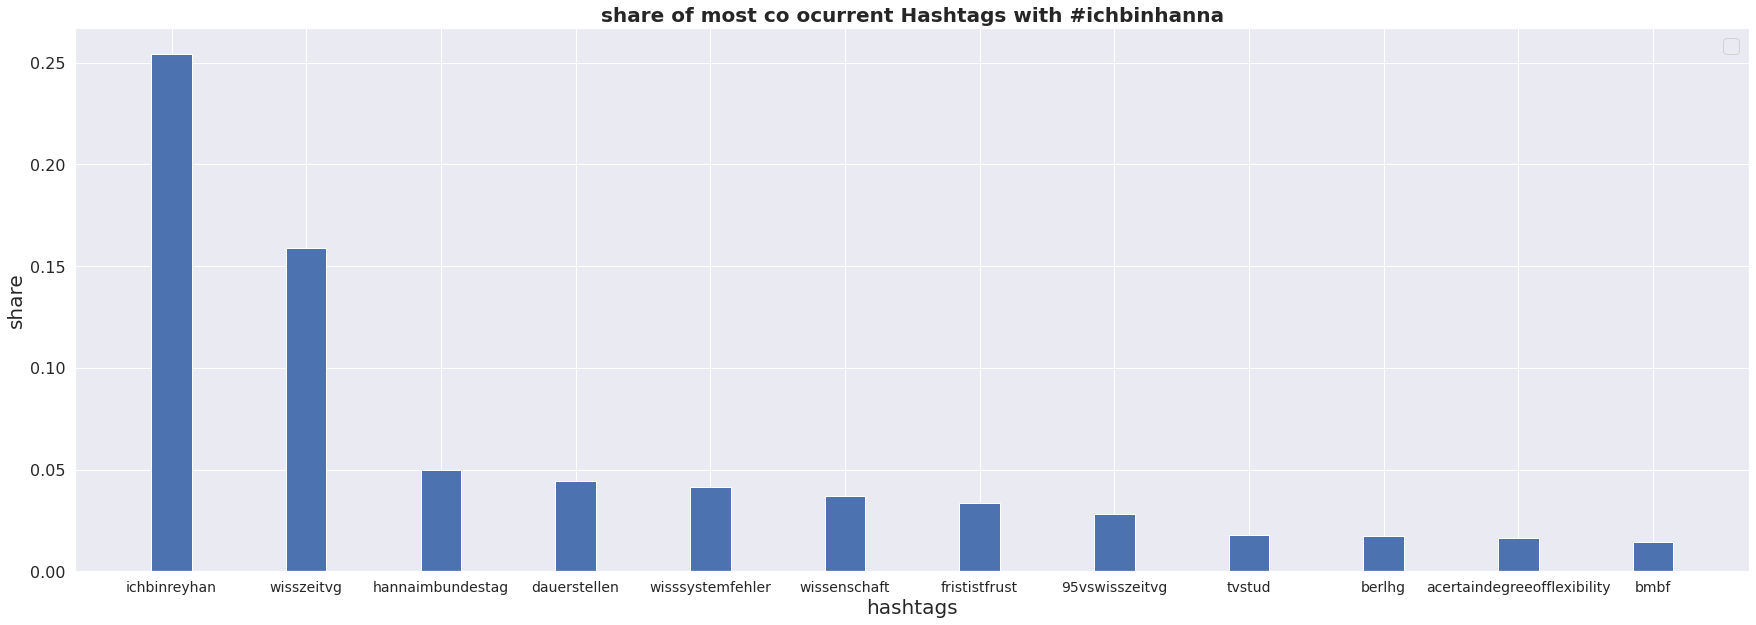

In [58]:
%matplotlib inline
sns.set(style="darkgrid")
fig = plt.subplots(figsize =(30, 10))
x=[i[0] for i in e][0:12]
y=[i[1] for i in e][0:12]
plt.bar(x,y,width = 0.3)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 20)
plt.xlabel("hashtags",fontsize = 20)
plt.ylabel("share",fontsize = 20)
plt.title("share of most co ocurrent Hashtags with #ichbinhanna",fontsize = 20,fontweight='bold')
plt.show()

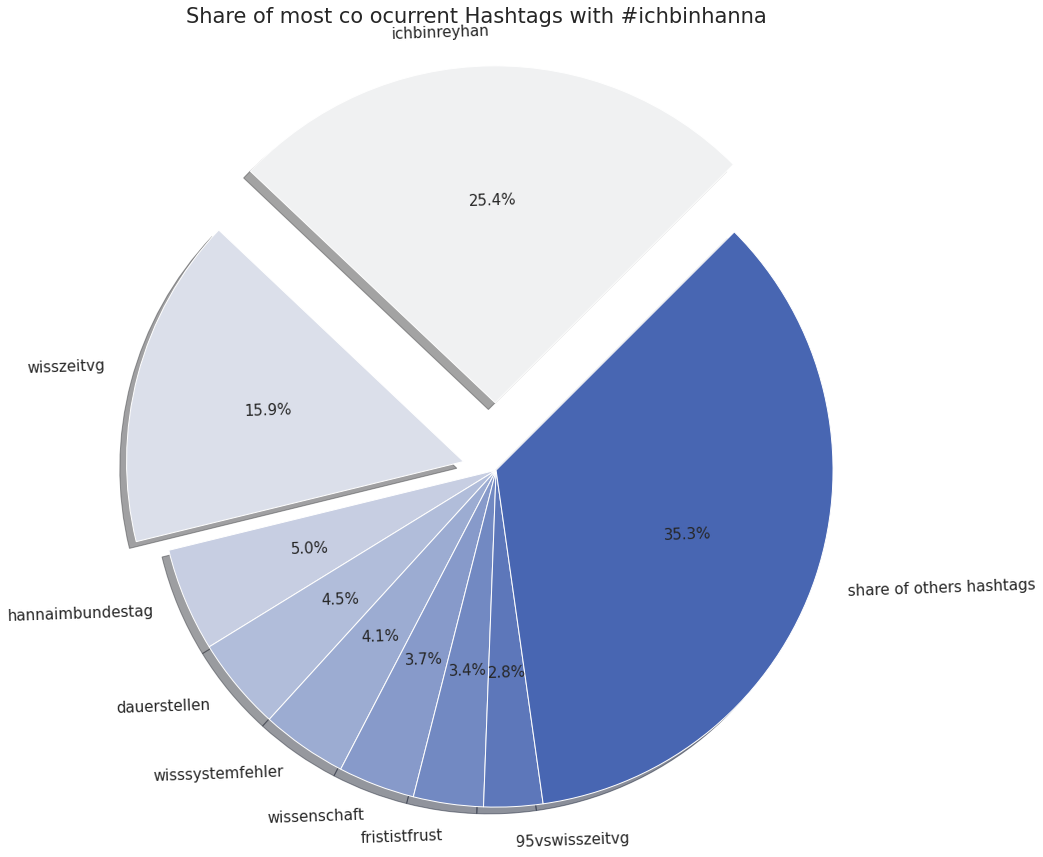

In [ ]:
# declaring data
fig = plt.subplots(figsize =(15, 15))
x=[i[0] for i in e][0:8]
y=[i[1] for i in e][0:8]
x.append("share of others hashtags")

y.append(1-sum(y))
#plt.legend(fontsize = 20)

#plt.title("share of most co ocurrent Hashtags with #ichbinhanna , threshold=2000 frequent",fontsize = 20)
#plt.show()
  
# define Seaborn color palette to use
palette_color = sns.color_palette( "light:#35A9",n_colors=10 )#,as_cmap=True  , blend:#7AB,#EDA   light:#35A9
myexplode = [0.2, 0.1, 0, 0,0,0,0,0,0]
# plotting data on chart
plt.pie(y, labels=x, colors=palette_color, autopct='%1.1f%%',shadow=True, startangle=45,explode = myexplode,textprops={'fontsize': 15,'rotation':2})
plt.title("Share of most co ocurrent Hashtags with #ichbinhanna ",fontsize = 21)

plt.axis('equal') 
# displaying chart
plt.show()

In [ ]:
len(myexplode)

12

In [72]:
#get the list of most frequent hastags with the specified hashtag except for "ichbinhanna" as this one is frequent with most of the hashtags  
def coocuring_hashtags_with2(dataset,hashtag):#,hashtag
  listOfAllHashtags=list()
  for row, hash in enumerate(dataset.hashtags):
    if dataset['timestamp'][row][0:10]>="2021-06-01" and hash!='[]':
      bb=hash.split(', ') 
      a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
      for i in range(len(a)):
        a[i]=a[i].lower()
      if "ichbinhanna" in a:
        a.remove("ichbinhanna")
      if hashtag in a and len(a)>1:  
        listOfAllHashtags.append(a)
  hashtgs=[]
  for i in listOfAllHashtags:
    hashtgs.extend(i)
  list_of_concurrent_hash=[(i,hashtgs.count(i)/len(listOfAllHashtags)) for i in hashtags_in_DS if hashtgs.count(i)>50 and i.lower()!=hashtag]

  

  return list_of_concurrent_hash


"Share of most co ocurrent_Hashtags with #wisszeitvg except for #ichbinhanna "

In [73]:
f=coocuring_hashtags_with2(df,'wisszeitvg')
f.sort(reverse=True , key= lambda k:k[1])


In [74]:
f

[('ichbinreyhan', 0.14696485623003194),
 ('dauerstellen', 0.08839190628328009),
 ('hannaimbundestag', 0.07614483493077742),
 ('bmbf', 0.07507987220447285),
 ('95vswisszeitvg', 0.06869009584664537),
 ('wissenschaft', 0.06602768903088392),
 ('ichbinhannah', 0.05378061767838126),
 ('frististfrust', 0.051118210862619806),
 ('27juni', 0.0463258785942492),
 ('karliczek', 0.04419595314164004),
 ('acertaindegreeofflexibility', 0.03407880724174654)]

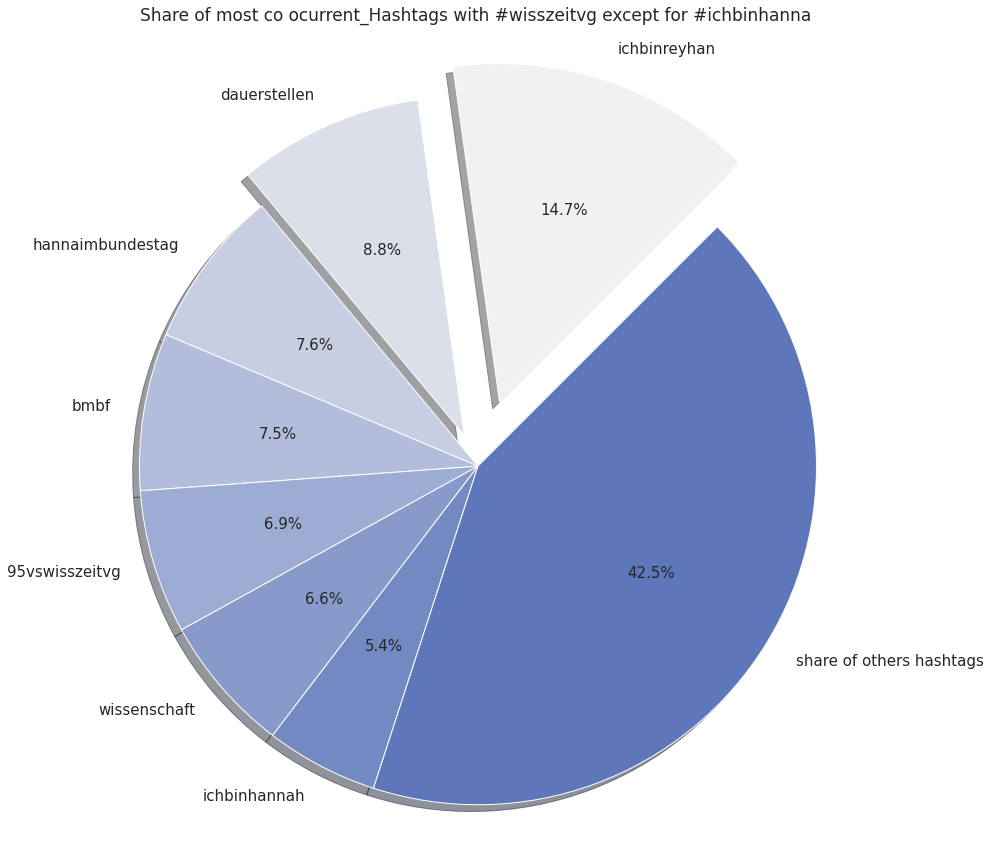

In [67]:
#fig = plt.subplots(figsize =(12, 7))
fig = plt.subplots(figsize =(15, 15))
x=[i[0] for i in f][0:8]
y=[i[1] for i in f][0:8]

x.append("share of others hashtags")

y.append(1-sum(y))
#plt.legend(fontsize = 20)

#plt.title("share of most co ocurrent Hashtags with #ichbinhanna , threshold=2000 frequent",fontsize = 20)
#plt.show()
  
# define Seaborn color palette to use
palette_color = sns.color_palette( "light:#35A9",n_colors=10 )#,as_cmap=True  , blend:#7AB,#EDA   light:#35A9
myexplode = [0.2, 0.1, 0,0,0,0,0,0]
# plotting data on chart
plt.pie(y, labels=x, colors=palette_color, autopct='%1.1f%%',shadow=True,explode=myexplode, startangle=45,textprops={'fontsize': 15})
plt.title("Share of most co ocurrent_Hashtags with #wisszeitvg except for #ichbinhanna ",fontsize = 17)

plt.axis('equal') 
# displaying chartmyexplo
plt.show()

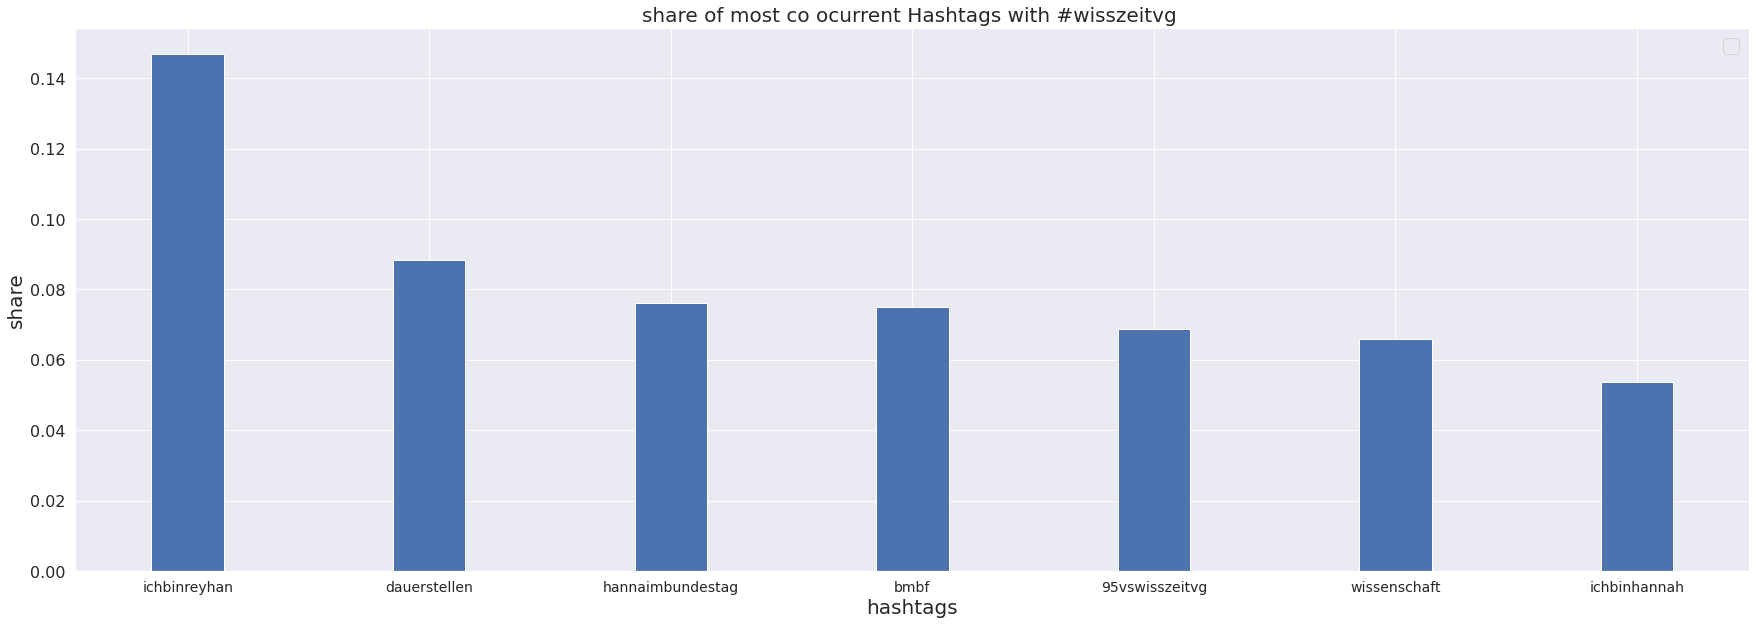

In [68]:
sns.set(style="darkgrid")
fig = plt.subplots(figsize =(30, 10))
x=[i[0] for i in f][0:15]
y=[i[1] for i in f][0:15]
plt.bar(x,y,width = 0.3)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 20)
plt.xlabel("hashtags",fontsize = 20)
plt.ylabel("share",fontsize = 20)
plt.title("share of most co ocurrent Hashtags with #wisszeitvg ",fontsize = 20)
plt.show()

"Share of most co ocurrent_Hashtags with #ichbinreyhan except for #ichbinhanna"

In [75]:
g=coocuring_hashtags_with2(df,"ichbinreyhan")
g.sort(reverse=True , key= lambda k:k[1])


In [76]:
g

[('wisssystemfehler', 0.14719848053181386),
 ('wisszeitvg', 0.13200379867046533),
 ('frististfrust', 0.09116809116809117),
 ('ichbinhannaat', 0.06695156695156695),
 ('dauerstellen', 0.059354226020892686),
 ('gegenwisszeitvg10', 0.05698005698005698),
 ('stopthecuts', 0.04131054131054131),
 ('ichbinhannah', 0.03798670465337132),
 ('ugnovelle', 0.03418803418803419),
 ('wissenschaft', 0.03418803418803419),
 ('firstgen', 0.03181386514719848),
 ('dauerstellenfürdaueraufgaben', 0.029439696106362774)]

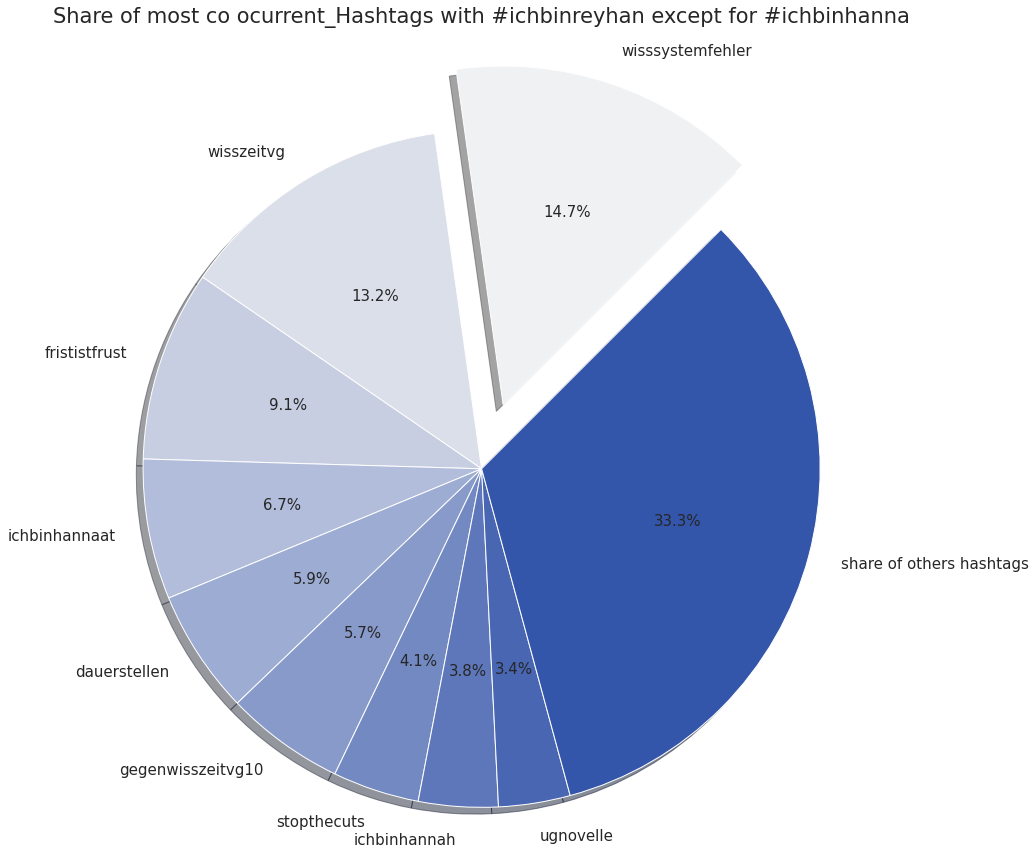

In [77]:
#fig = plt.subplots(figsize =(12, 7))
fig = plt.subplots(figsize =(15, 15))
x=[i[0] for i in g][0:9]
y=[i[1] for i in g][0:9]

x.append("share of others hashtags")

y.append(1-sum(y))
#plt.legend(fontsize = 20)

#plt.title("share of most co ocurrent Hashtags with #ichbinhanna , threshold=2000 frequent",fontsize = 20)
#plt.show()
  
# define Seaborn color palette to use
palette_color = sns.color_palette( "light:#35A9",n_colors=10 )#,as_cmap=True  , blend:#7AB,#EDA   light:#35A9
myexplode = [0.2, 0, 0, 0,0,0,0,0,0,0]
# plotting data on chart
plt.pie(y, labels=x, colors=palette_color, autopct='%1.1f%%',shadow=True,explode=myexplode, startangle=45,textprops={'fontsize': 15})
plt.title("Share of most co ocurrent_Hashtags with #ichbinreyhan except for #ichbinhanna",fontsize = 21)

plt.axis('equal') 
# displaying chartmyexplo
plt.show()

# wordcloud

#trend os hashtags each 3 month

In [ ]:
dates=list()

for row,record in enumerate(df.hashtags):
  if record!='[]'and df['timestamp'][row][0:7]>'2021-05' : 
    dates.append(df['timestamp'][row][0:7])


In [ ]:
date=list()
for dt in dates:
  if dt not in date:
    date.append(dt)


In [ ]:
date.sort()
date

In [ ]:
date_each3= [dt for row, dt in enumerate(date) if row%3==0]

In [ ]:
date_each3

['2021-06', '2021-09', '2021-12', '2022-03', '2022-06', '2022-09']

In [ ]:
i=1
j=6
for i in range(1,3):
  for j in range(1,13):
    if i==1 and j>5 and j<10 or i==2 and j<10:
      globals()[f'hash202{i}_0{j}']=list()
      globals()[f'hash202{i}_0{j}'].extend([hash for row,hash in enumerate(df['hashtags']) if df['timestamp'][row][0:7]==f'202{i}-0{j}' and hash!='[]'])
        
    elif i==1 and j>5 and j>=10 or i==2 and j>=10:
      globals()[f'hash202{i}_{j}']=list()
      globals()[f'hash202{i}_{j}'].extend([hash for row,hash in enumerate(df['hashtags']) if df['timestamp'][row][0:7]==f'202{i}-{j}' and hash!='[]'])

In [ ]:
#preprocessing the hashtags list from specific periods
i=1
j=6
for i in range(1,3):
  for j in range(1,13):
    if i==1 and j>5 and j<10 or i==2 and j<10:
      globals()[f'all_hashtags_202{i}_0{j}']=list()
      for s in globals()[f'hash202{i}_0{j}']:
          bb=s.split(', ')
          a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
          globals()[f'all_hashtags_202{i}_0{j}'].extend(a)
        
        
    elif i==1 and j>5 and j>=10 or i==2 and j>=10:
      globals()[f'all_hashtags_202{i}_{j}']=list()
      for s in globals()[f'hash202{i}_{j}']:
          bb=s.split(', ')
          a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
          globals()[f'all_hashtags_202{i}_{j}'].extend(a)

In [78]:
def hashtag_counter(hash_ls,txt):
  lis=list()
  for hashtag in hash_ls:
    lis.append(hashtag.lower())
  return lis.count(txt.lower())

In [79]:
def hashtag_num_list(hashtag):
  hashtag_num=list()
  for dt in date_each3:
      i,j = dt[3],dt[5:]
      lis = globals()[f'all_hashtags_202{i}_{j}']
      hashtag_num.append(hashtag_counter(lis,hashtag))
  return hashtag_num

In [ ]:
hashtag_num_list("ichbinhanna")

[11126, 1845, 984, 893, 1964, 878]

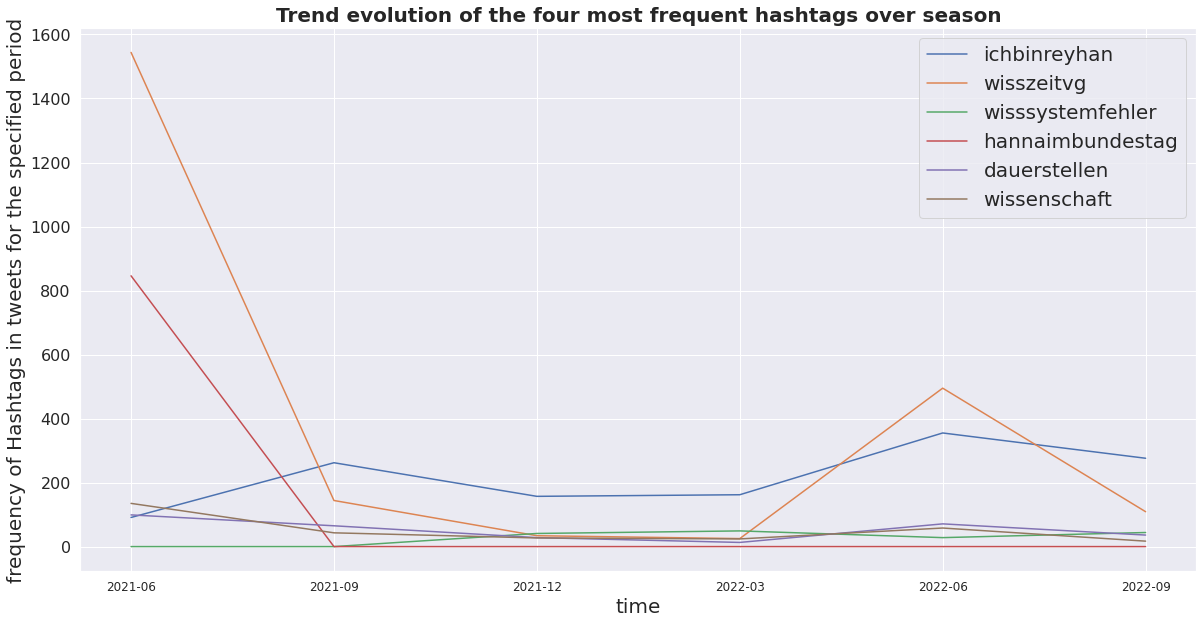

In [ ]:
%matplotlib inline
sns.set(style="darkgrid")
#hashlist_from_database=hashlist_from_database[0:4]
fig = plt.figure(figsize = (20, 10))
for i in hashlist_from_database:
  plt.plot(date_each3,hashtag_num_list(i))#/summ

plt.legend([j for j in hashlist_from_database ], fontsize=20) 
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 16)

plt.xlabel("time",fontsize = 20)
plt.ylabel("frequency of Hashtags in tweets for the specified period",fontsize = 20)
plt.title("Trend evolution of the four most frequent hashtags over season",fontsize = 20,fontweight='bold')
plt.show()



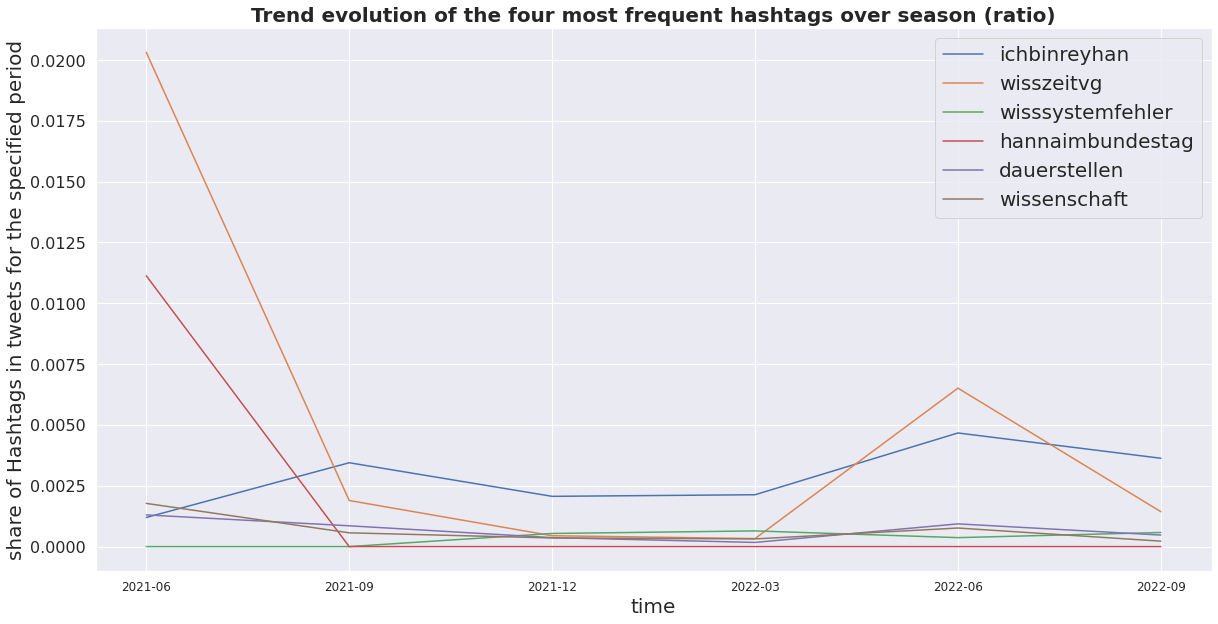

In [ ]:

#hashlist_from_database=hashlist_from_database[0:4]
fig = plt.figure(figsize = (20, 10))
for i in hashlist_from_database:
  plt.plot(date_each3,np.array(hashtag_num_list(i))/np.size(lis))#/summ

plt.legend([j for j in hashlist_from_database ], fontsize=20) 
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 16)

plt.xlabel("time",fontsize = 20)
plt.ylabel("share of Hashtags in tweets for the specified period",fontsize = 20)
plt.title("Trend evolution of the four most frequent hashtags over season (ratio)",fontsize = 20,fontweight='bold')
plt.show()



<ipython-input-123-8e328c6c798a>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(date_each3,np.array(np.log(hashtag_num_list(i))/np.size(lis)))#/summ


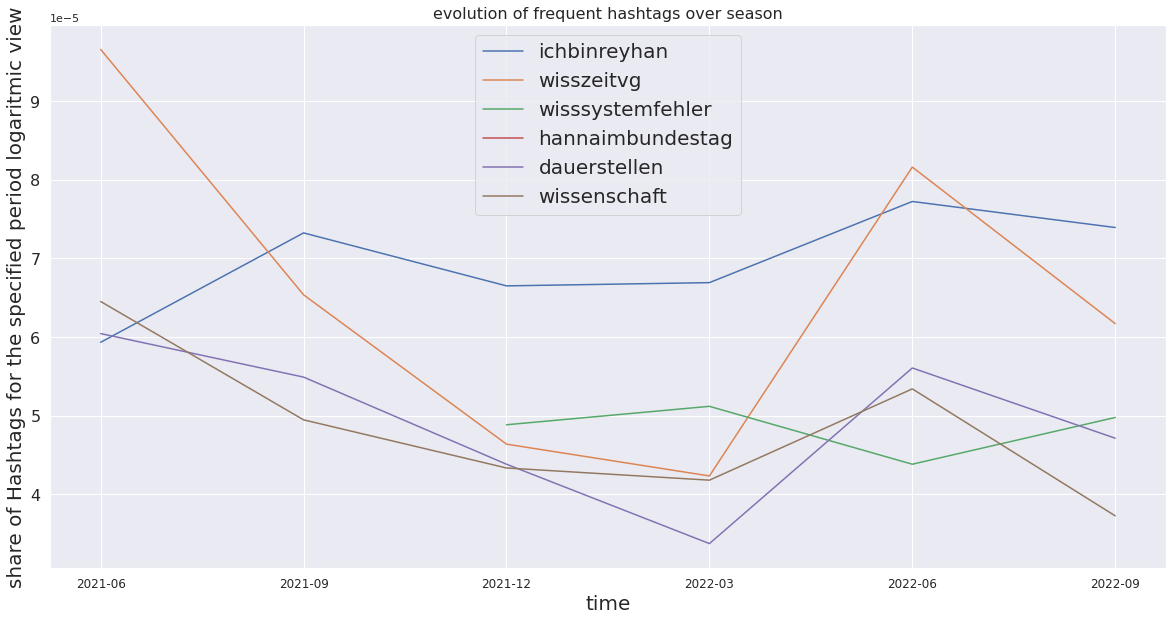

In [ ]:
#hashlist_from_database=hashlist_from_database[0:4]
fig = plt.figure(figsize = (20, 10))
for i in hashlist_from_database:
  plt.plot(date_each3,np.array(np.log(hashtag_num_list(i))/np.size(lis)))#/summ

plt.legend([j for j in hashlist_from_database ], fontsize=20) 
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 16)

plt.xlabel("time",fontsize = 20)
plt.ylabel("share of Hashtags for the specified period logaritmic view",fontsize = 20)
plt.title("evolution of frequent hashtags over season",fontsize = 16)
plt.show()



# coocurring hashtags plot over time


In [ ]:
def coocuring_hashtags_with(dataset,hashtag):#,hashtag
  listOfAllHashtags=list()
  for row, hash in enumerate(dataset.hashtags):
    if dataset['timestamp'][row][0:10]>="2021-06-01" and hash!='[]':
      bb=hash.split(', ') 
      a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
      for i in range(len(a)):
        a[i]=a[i].lower()
      if hashtag in a and len(a)>1:  
        listOfAllHashtags.append(a)
  hashtgs=[]
  for i in listOfAllHashtags:
    hashtgs.extend(i)
  list_of_concurrent_hash=[(i,hashtgs.count(i)/len(listOfAllHashtags)) for i in hashtags_in_DS if hashtgs.count(i)>600 and i.lower()!=hashtag]

  

  return list_of_concurrent_hash


In [ ]:
h=coocuring_hashtags_with(df,"ichbinhanna")
h.sort(reverse=True , key= lambda k:k[1])

In [ ]:
h

[('ichbinreyhan', 0.25441262041766344),
 ('wisszeitvg', 0.15878968125686946),
 ('hannaimbundestag', 0.0496541022822784),
 ('dauerstellen', 0.0446111075192345),
 ('wisssystemfehler', 0.04124911101053857)]

In [ ]:
hashlis2=[i[0] for i in h]

In [ ]:
hashlis2

['ichbinreyhan',
 'wisszeitvg',
 'hannaimbundestag',
 'dauerstellen',
 'wisssystemfehler']

In [ ]:

i=1
j=6
for i in range(1,3):
  for j in range(1,13):
    if i==1 and j>5 and j<10 or i==2 and j<10:
      globals()[f'hash202{i}_0{j}']=list()
      globals()[f'hash202{i}_0{j}'].extend([hash for row,hash in enumerate(df['hashtags']) if df['timestamp'][row][0:7]==f'202{i}-0{j}' and hash!='[]' and "ichbinhanna" in hash] )
        
    elif i==1 and j>5 and j>=10 or i==2 and j>=10:
      globals()[f'hash202{i}_{j}']=list()
      globals()[f'hash202{i}_{j}'].extend([hash for row,hash in enumerate(df['hashtags']) if df['timestamp'][row][0:7]==f'202{i}-{j}' and hash!='[]' and "ichbinhanna" in hash])
i=1
j=6
for i in range(1,3):
  for j in range(1,13):
    if i==1 and j>5 and j<10 or i==2 and j<10:
      globals()[f'all_hashtags_202{i}_0{j}']=list()
      for s in globals()[f'hash202{i}_0{j}']:
          bb=s.split(', ')
          a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
          globals()[f'all_hashtags_202{i}_0{j}'].extend(a)
        
        
    elif i==1 and j>5 and j>=10 or i==2 and j>=10:
      globals()[f'all_hashtags_202{i}_{j}']=list()
      for s in globals()[f'hash202{i}_{j}']:
          bb=s.split(', ')
          a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
          globals()[f'all_hashtags_202{i}_{j}'].extend(a)




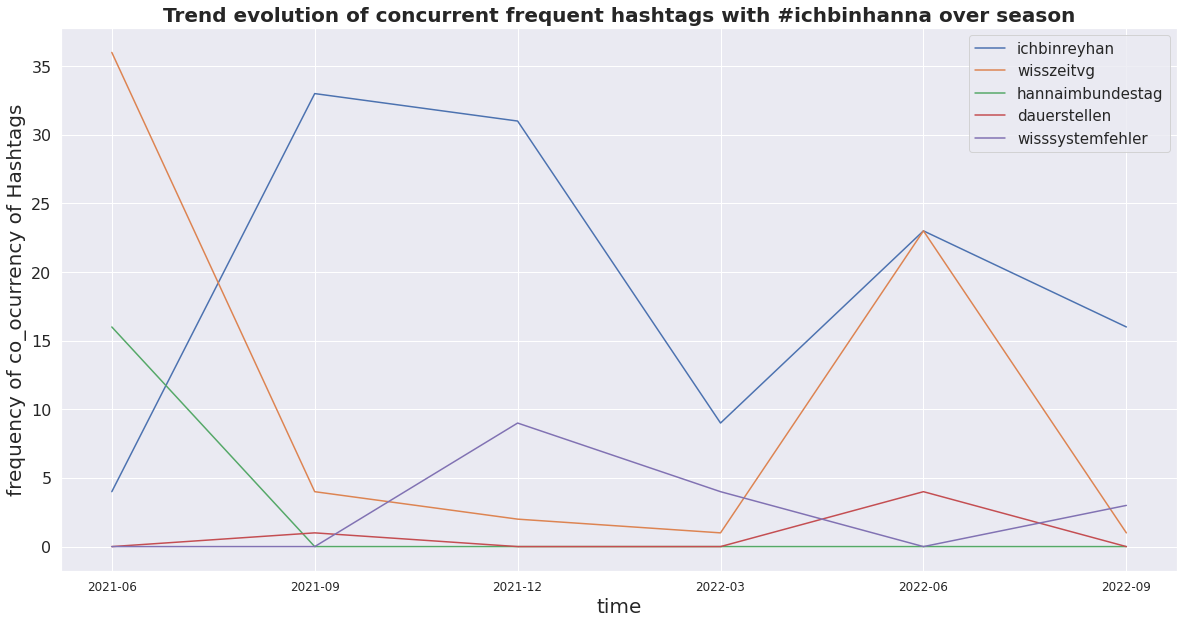

In [ ]:
fig = plt.figure(figsize = (20, 10))
for i in hashlis2:
  plt.plot(date_each3,hashtag_num_list(i))#/summ

plt.legend([j for j in hashlis2 ], fontsize=15) 
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 16)

plt.xlabel("time",fontsize = 20)
plt.ylabel("frequency of co_ocurrency of Hashtags",fontsize = 20)
plt.title("Trend evolution of concurrent frequent hashtags with #ichbinhanna over season",fontsize = 20,fontweight='bold')
plt.show()


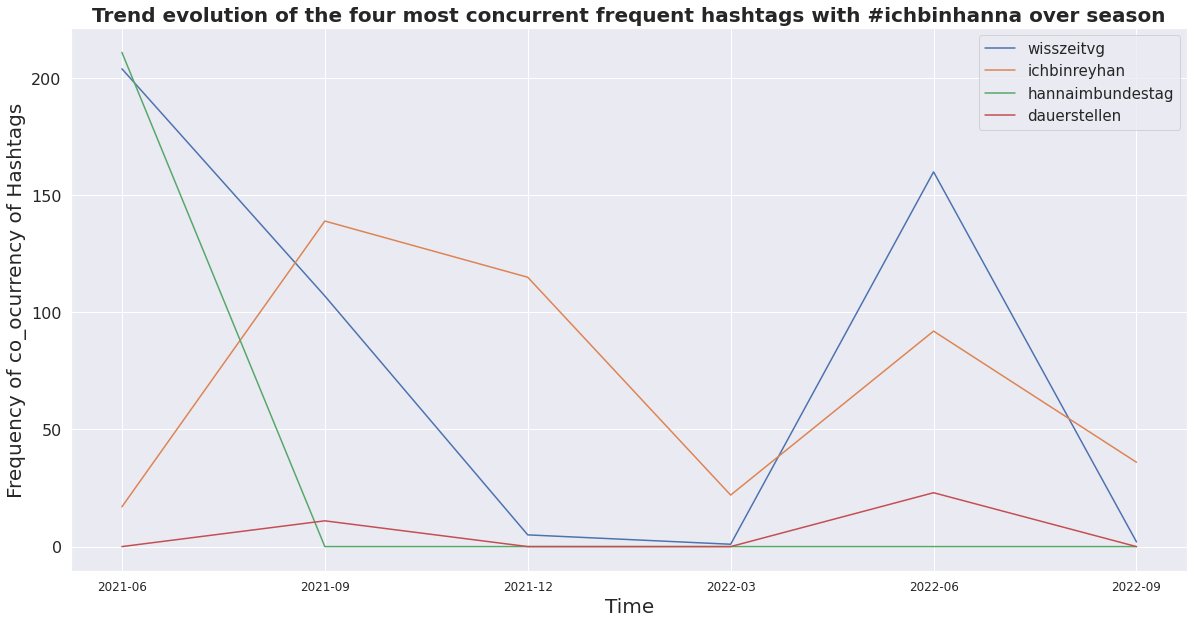

In [ ]:
fig = plt.figure(figsize = (20, 10))
hashlis3=hashlis2[0:4]
for i in hashlis3:
  plt.plot(date_each3,hashtag_num_list(i))#/summ

plt.legend([j for j in hashlis2 ], fontsize=15) 
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 16)

plt.xlabel("Time",fontsize = 20)
plt.ylabel("Frequency of co_ocurrency of Hashtags",fontsize = 20)
plt.title("Trend evolution of the four most concurrent frequent hashtags with #ichbinhanna over season",fontsize = 20,fontweight='bold')
plt.show()
